In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as mcolors
plt.style.use('../../Paul_style.txt')


In [94]:
base = "../Spectral-Processing/Spectra/OUT/Spec_0_"

file = "HD189-PICKET-ALL-CLOUDS"

full_df = pd.read_csv(base + file + "_phase_0.0_inc_0.00.00.0000.00_emission_map.dat",
                 names=['tau_index', 'wavelength_m', 'lon', 'lat', 'pressure_pa'],
                 delim_whitespace=True)

wavelengths = list(set(full_df["wavelength_m"]))

# colormap
cm_name = 'lapaz'
cm_file = np.loadtxt(f'../../ScientificColourMaps7/' + cm_name + '/'+ cm_name +'.txt')
my_colors = mcolors.LinearSegmentedColormap.from_list(cm_name, cm_file)

In [98]:
min_val = (int(np.amin(full_df.pressure_pa/1e3))) / 100
max_val = (int(np.amax(full_df.pressure_pa/1e3))) / 100

print (min_val, max_val)

0.18 0.41


/home/imalsky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/home/imalsky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/home/imalsky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/home/imalsky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/home/im

<Figure size 3600x2400 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

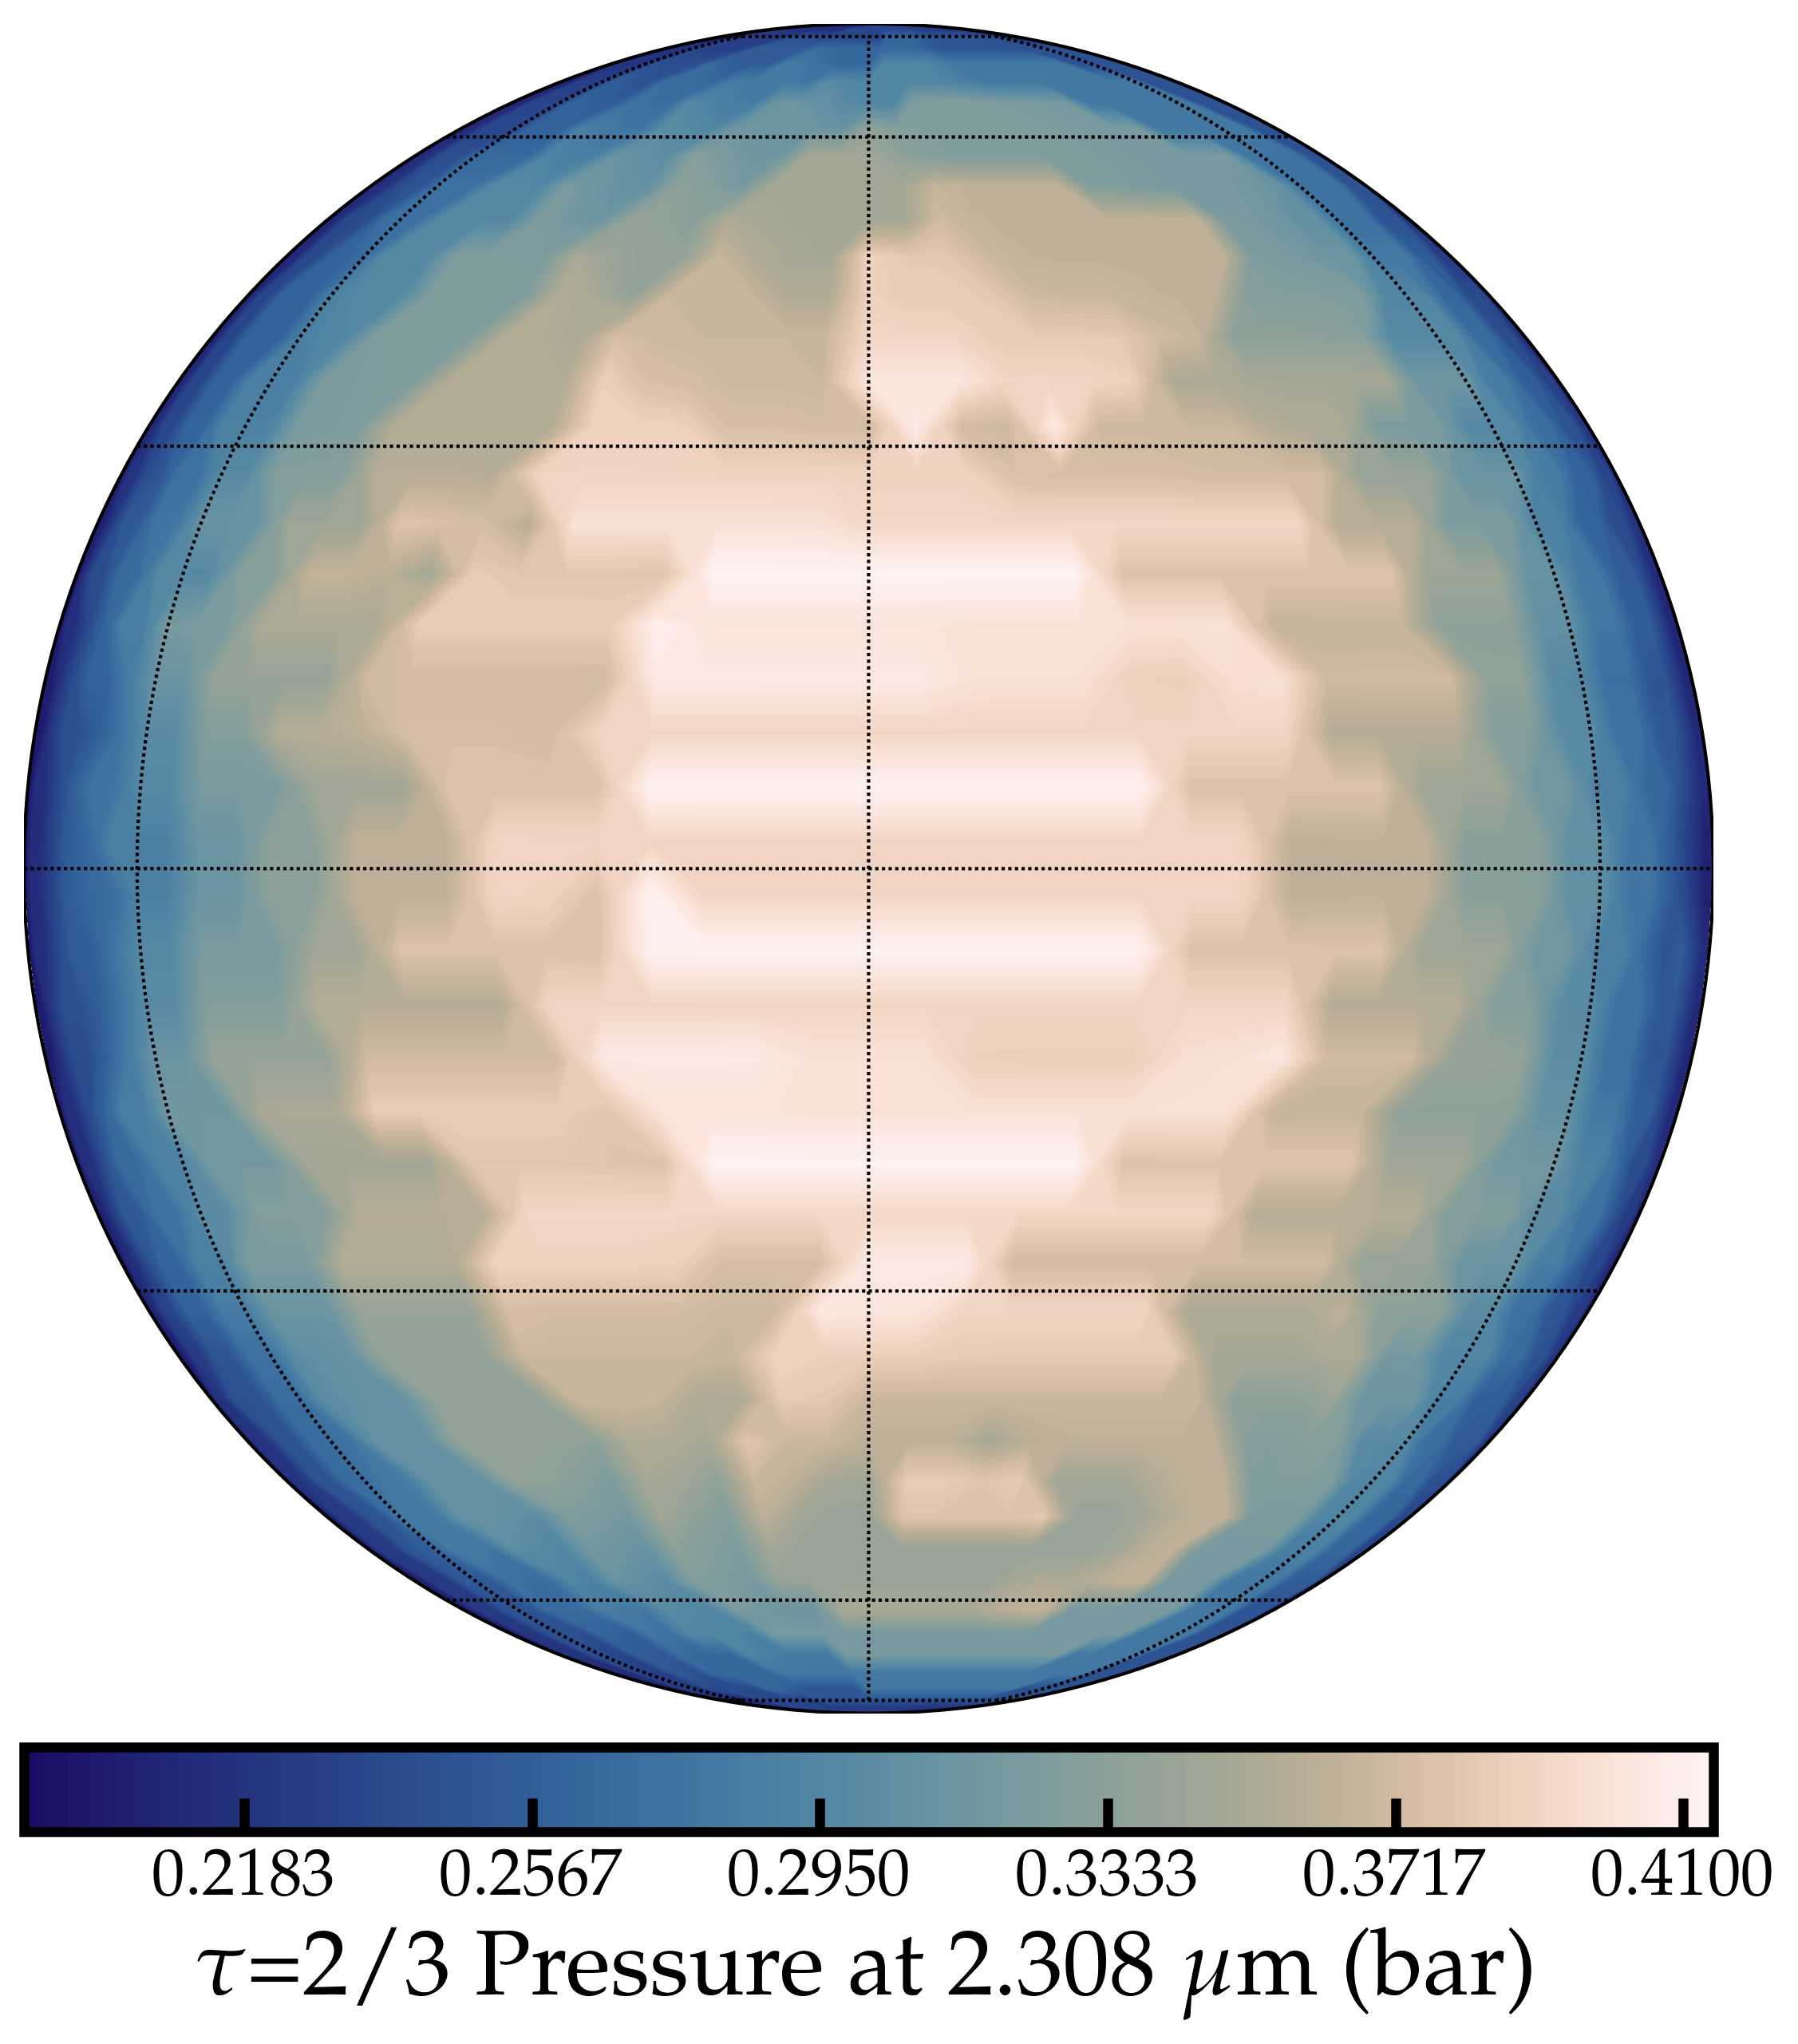

In [104]:
for i in range(len(wavelengths)):
    plt.clf()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    plt.subplots_adjust(wspace=0.2, hspace=0.02)
    
    df = full_df[full_df["wavelength_m"] == wavelengths[i]]
    

    map = Basemap(projection='ortho',lat_0=0,lon_0=180,resolution='l', ax=ax)
    
    map.drawparallels(np.arange(-90.,90.,30.))
    map.drawmeridians(np.arange(0.,360.,60.))

    # compute native map projection coordinates of lat/lon grid.
    lons = np.reshape(list(df.lon), (48,49))
    lats = np.reshape(list(df.lat), (48,49))

    x, y = map(lons, lats)

    pressure = np.reshape(list(df.pressure_pa), (48, 49))

    emap = map.contourf(x, y, pressure/1e5, levels=200, cmap=my_colors)
    #map.contour(x, y, pressure/1e5, levels=[0.2, 0.25, 0.30, 0.35, 0.40], cmap=my_colors)

    wav_str = str(np.round(wavelengths[i] * 1e6, 3))
    cb = map.colorbar(emap, ticks=np.linspace(min_val, max_val, 7),
                      location='bottom', label=r'$\tau$=2/3 Pressure at ' + wav_str + ' $\mu$m (bar)')
    plt.savefig('../Figures/{}_emission_map_{}.png'.format(file, wav_str), bbox_inches='tight', dpi=200)

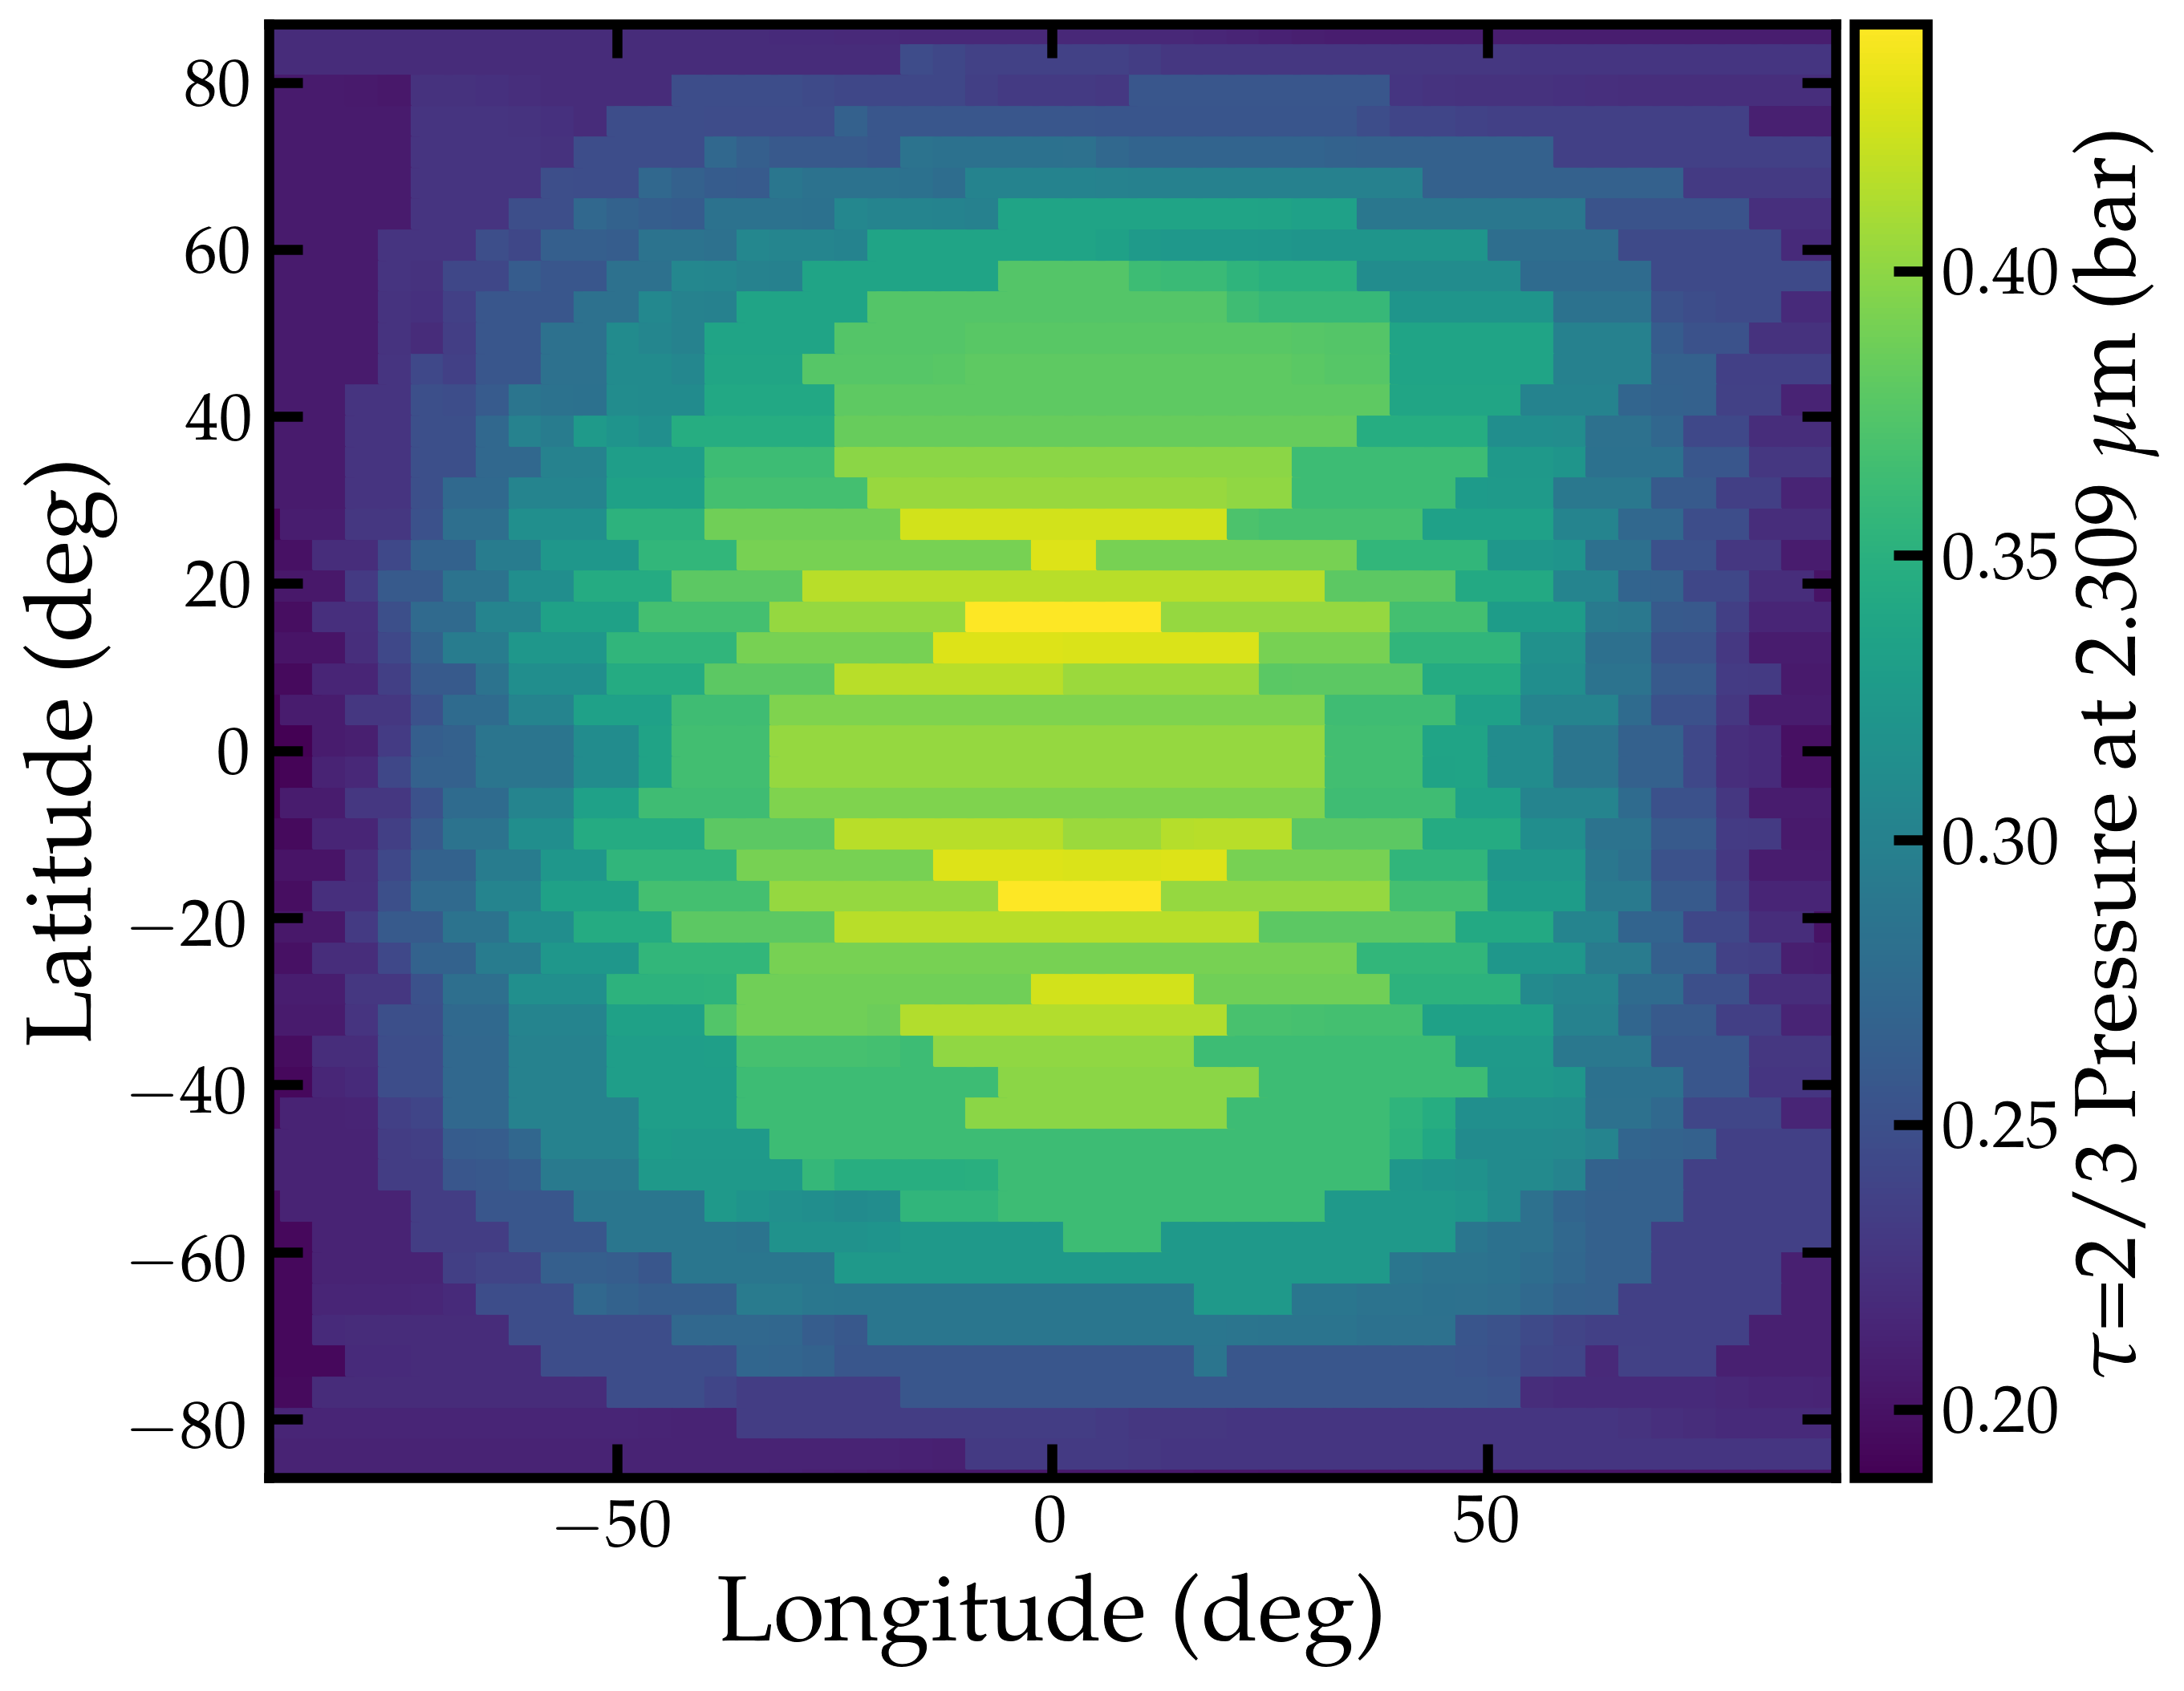

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
plt.subplots_adjust(wspace=0.01, hspace=0.015)
    
emap = ax.scatter(df.lon - 180, df.lat, c=df.pressure_pa / 1e5, s=140, marker='s')
ax.set_ylim(-87, 87)
ax.set_xlim(-90, 90)
ax.set_ylabel('Latitude (deg)')
ax.set_xlabel('Longitude (deg)')

cbar = fig.colorbar(emap, aspect=20, pad=0.01, orientation = 'vertical')
cbar.set_label(r'$\tau$=2/3 Pressure at ' + wav_str + ' $\mu$m (bar)', fontsize=26)